## Pr√©traitement de `df_entreprises`

Le pr√©traitement de `df_entreprises` comprend plusieurs √©tapes. Voici les t√¢ches pr√©alables de pr√©traitement :

### V√©rification et Correction des Donn√©es
- **V√©rification des valeurs manquantes** : Inspecter le DataFrame pour identifier et traiter les valeurs manquantes.
- **Suppression des doublons** : Rechercher et √©liminer les enregistrements en double pour √©viter la redondance.
- **Correction des erreurs** : Analyser les donn√©es pour d√©tecter et corriger les erreurs potentielles.

### Normalisation des Textes
Utilisation de la classe `EntreprisePreprocessor` du fichier `prepro_entreprises` pour :
- **`clean_location`** : Standardiser les formats de localisation, en ajustant les majuscules et minuscules.
- **`clean_company_name`** : 
  - Retirer les URL et autres mentions non pertinentes, comme "Home |".
  - Extraire la partie pertinente du nom d'entreprise (par exemple, "Black Kube" de "Home | Black Kube garde meuble et self stockage").
  - Uniformiser les noms pour assurer la coh√©rence dans les abr√©viations et les formats (e.g., remplacer 'Demenagement' par 'D√©m√©nagement').

### Traitement des Services Propos√©s
- **Nettoyage** : Nettoyer et pr√©parer les listes de services propos√©s.
- **One-hot Encoding** : Convertir les listes de services en une s√©rie de variables indicatrices pour faciliter l'analyse quantitative (Optiennelle !!!).
- **Extraction d'informations sp√©cifiques** : Identifier et extraire le type de service le plus mentionn√© pour des analyses ult√©rieures (classe ::).

### Traitement des URLs
- **Note** : Le traitement sp√©cifique des URLs n'est pas abord√© dans cette phase.



In [109]:
# fichier original::: entreprises.csv
import pandas as pd

df_entreprises=pd.read_csv("entreprises.csv")
display(df_entreprises.head())
display(df_entreprises.info())
display(df_entreprises['Entreprise'].unique())

#df_entreprises[df_entreprises['Entreprise']=='Colisweb']

Entreprise  \
0  Nextories (ex i-Demenager)   
1                  La Tourn√©e   
2   CartonsDeDemenagement.com   
3                     LOCABOX   
4          La Tribu du Carton   

                                                 Url            Location  \
0     https://fr.trustpilot.com/review/nextories.com       PARIS,¬†France   
1  https://fr.trustpilot.com/review/www.la-tourne...       Paris,¬†France   
2  https://fr.trustpilot.com/review/www.cartonsde...    LIMONEST,¬†France   
3        https://fr.trustpilot.com/review/locabox.fr     Lormont,¬†France   
4  https://fr.trustpilot.com/review/www.latribudu...  V√©nissieux,¬†France   

   TrustScore  NombreAvis                                   ServicesProposes  
0         4.9        3729  ['Entreprise de livraison', 'Service de transp...  
1         4.9         489  ['Boutique de boissons non alcoolis√©es', 'Dist...  
2         4.8       11400  ["Magasin d'articles d'emballage", "Magasin d'...  
3         4.8        7546  ['Centre de stockage', 'Entrep√¥t', 'Centre de ...  
4         4.8        5184  ["Magasin d'articles de d√©m√©nagement", "Magasi...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entreprise        220 non-null    object 
 1   Url               220 non-null    object 
 2   Location          220 non-null    object 
 3   TrustScore        220 non-null    float64
 4   NombreAvis        220 non-null    int64  
 5   ServicesProposes  220 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.4+ KB


None

array(['Nextories (ex i-Demenager)', 'La Tourn√©e',
       'CartonsDeDemenagement.com', 'LOCABOX', 'La Tribu du Carton',
       'Merci Facteur', 'YouStock', 'Lockall', 'papernest', 'Welkit',
       'Ecocarton.fr', 'Zolemba FR', 'Carton Market', 'Cocolis',
       'Paysdesenveloppes.fr', 'Demeclic', 'COLIBACK', 'UBBABIO',
       'Mon-emballage.com', 'BetweenBox', 'Expedomtom', 'Weed Side Story',
       'Happy-Post', 'Packhelp', 'Colicoli', 'ThePackengers', 'Shopiles',
       'ColisExpat', 'FRETBAY', 'Upela', 'Limited Resell',
       'Les d√©m√©nageurs bretons', 'Parcel Monkey France', 'Lettre24',
       "L'Officiel du d√©m√©nagement", 'Pakup-Emballage.fr',
       'STLS - Soci√©t√© de Transport, Livraison et Stockage',
       'Green Kartel', 'AirSelli', 'UTOPYA', 'Lessaveursdenoemie',
       'pubensac', 'Best Demenagements', 'Shopopop',
       'Bonjour Demenagement', 'D√©m√©nagements J√©z√©quel', 'Hoplunch',
       'Trustdem - D√©m√©nagement pas cher  ', 'Delight Cbd',
       'Sosea_Autom

In [110]:
df_entreprises[df_entreprises['Entreprise']=='ID Logistics']

Empty DataFrame
Columns: [Entreprise, Url, Location, TrustScore, NombreAvis, ServicesProposes]
Index: []

## Utilisation de la classe :: EntreprisePreprocessor

In [2]:
# exemple d'utilisation de la classe
from prepro_entreprises import EntreprisePreprocessor
# Cr√©ation de l'instance du pr√©processeur
preprocessor = EntreprisePreprocessor()   
# Adapter le pr√©processeur
preprocessor.fit(df_entreprises)
# Transformer les donn√©es
transformed_df = preprocessor.transform(df_entreprises)
# Afficher le DataFrame transform√©
transformed_df.head()


Entreprise  \
0  nextories (ex i-demenager)   
1                  la tourn√©e   
2       cartonsdedemenagement   
3                     locabox   
4          la tribu du carton   

                                                 Url            Location  \
0     https://fr.trustpilot.com/review/nextories.com       Paris, France   
1  https://fr.trustpilot.com/review/www.la-tourne...       Paris, France   
2  https://fr.trustpilot.com/review/www.cartonsde...    Limonest, France   
3        https://fr.trustpilot.com/review/locabox.fr     Lormont, France   
4  https://fr.trustpilot.com/review/www.latribudu...  V√©nissieux, France   

   TrustScore  NombreAvis                                   ServicesProposes  
0         4.9        3729  [Entreprise de livraison, Service de transport...  
1         4.9         489  [Boutique de boissons non alcoolis√©es, Distrib...  
2         4.8       11400  [Magasin d'articles d'emballage, Magasin d'art...  
3         4.8        7546  [Centre de stockage, Entrep√¥t, Centre de stock...  
4         4.8        5184  [Magasin d'articles de d√©m√©nagement, Magasin d...

In [3]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 0 to 219
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entreprise        216 non-null    object 
 1   Url               216 non-null    object 
 2   Location          216 non-null    object 
 3   TrustScore        216 non-null    float64
 4   NombreAvis        216 non-null    int64  
 5   ServicesProposes  216 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.8+ KB


In [4]:
print(transformed_df['NombreAvis'].unique())

[ 3729   489 11400  7546  5184  2658   886   154  8079  4765  2159   274
 28183  3863  3849  1108  6457    39  3501   351   117  4165  3885   735
 71430  1850  1570 10781  5368  1382   286 10467   607   300  3963   239
   229   142   137   335   107    69    64 13815   647   138   131   125
    54    35    23  3622   328    32    30    18   429   177    14    13
   320    51    16    10   816    90    66    53     9     8     7   129
    97    49    37     6   122     5 11071  4060   297    36     4     3
 77049   214    47 10809  1442   406    12     2    25     1  2282   521
 23579  6604   161     0 80643   535   266    43   235    46  2859    99
   303   166  3748   246  9477  4171  7032 13853   801]


In [60]:
print(transformed_df['Entreprise'].unique())

['nextories (ex i-demenager)' 'la tourn√©e' 'cartonsdedemenagement'
 'locabox' 'la tribu du carton' 'merci facteur' 'youstock' 'lockall'
 'papernest' 'welkit' 'ecocarton' 'zolemba fr' 'carton market' 'cocolis'
 'paysdesenveloppes' 'demeclic' 'coliback' 'ubbabio' 'mon-emballage'
 'betweenbox' 'expedomtom' 'weed side story' 'happy-post' 'packhelp'
 'colicoli' 'thepackengers' 'shopiles' 'colisexpat' 'fretbay' 'upela'
 'limited resell' 'les d√©m√©nageurs bretons' 'parcel monkey france'
 'lettre24' "l'officiel du d√©m√©nagement" 'pakup-emballage'
 'stls - soci√©t√© de transport, livraison et stockage' 'green kartel'
 'airselli' 'utopya' 'lessaveursdenoemie' 'pubensac' 'best demenagements'
 'shopopop' 'bonjour demenagement' 'd√©m√©nagements j√©z√©quel' 'hoplunch'
 'trustdem - d√©m√©nagement pas cher' 'delight cbd'
 'sosea_automotive logistics' 'fraise' 'warning group' 'tpop'
 'excello mobilis d√©m√©nagement' 'cafeographe' 'jenlevejelivre' 'tut-tut'
 'kingbox' 'maison cocktail' 'asntransport 

In [5]:
print(transformed_df[transformed_df['NombreAvis']==0])

                                   Entreprise  \
140                                 speedydem   
141          meilleur demenageur-demenagement   
142  black kube garde meuble et self stockage   
143                                 toncarton   
176                          pro demenagement   
177                                 ineo pack   
178                      demenagement blondel   
179                         le roy logistique   
180                      logistics operations   
181                                  takeaway   
182                                     hipli   
183                                    sechim   
184                 schoeller allibert france   
185                          bigbagcenter sas   
186                                     bundd   
187                                 springare   
188                                day agency   
189                                  instavan   
190                              shippinghero   
191                 

In [6]:
df_entreprise_reduit=transformed_df[['Entreprise','ServicesProposes']]

In [7]:
df_entreprise_reduit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 0 to 219
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Entreprise        216 non-null    object
 1   ServicesProposes  216 non-null    object
dtypes: object(2)
memory usage: 5.1+ KB


## Utilisation de la Classe `Geocoder`

Dans la classe `Geocoder`, nous r√©cup√©rons les coordonn√©es g√©ographiques afin de visualiser sur une carte la localisation de chaque entreprise.

### Processus de R√©cup√©ration des Coordonn√©es
Pour chaque adresse pr√©sente dans la colonne `Location` du DataFrame, la classe `Geocoder` effectue les op√©rations suivantes :
- **R√©cup√©ration des coordonn√©es** : Extraction des coordonn√©es (latitude et longitude) associ√©es √† chaque adresse.
- ** Ajouetr les coorrdonn√©e dans deux colonnes dans notre data frame 

In [95]:
# je travail sur la calsse d√©j√† crerr
from Geocodification import Geocoder

# Create an instance of the Geocoder / pour obtenire les corrdonnes ()
geocodonnees = Geocoder(user_agent="test_app")
 # Test adding coordinates to the DataFrame
geocodonnees.add_coordinates(df_entreprises)
df_entreprises.head()



Entreprise  \
0  Nextories (ex i-Demenager)   
1                  La Tourn√©e   
2   CartonsDeDemenagement.com   
3                     LOCABOX   
4          La Tribu du Carton   

                                                 Url            Location  \
0     https://fr.trustpilot.com/review/nextories.com       PARIS,¬†France   
1  https://fr.trustpilot.com/review/www.la-tourne...       Paris,¬†France   
2  https://fr.trustpilot.com/review/www.cartonsde...    LIMONEST,¬†France   
3        https://fr.trustpilot.com/review/locabox.fr     Lormont,¬†France   
4  https://fr.trustpilot.com/review/www.latribudu...  V√©nissieux,¬†France   

   TrustScore  NombreAvis                                   ServicesProposes  \
0         4.9        3729  ['Entreprise de livraison', 'Service de transp...   
1         4.9         489  ['Boutique de boissons non alcoolis√©es', 'Dist...   
2         4.8       11400  ["Magasin d'articles d'emballage", "Magasin d'...   
3         4.8        7546  ['Centre de stockage', 'Entrep√¥t', 'Centre de ...   
4         4.8        5184  ["Magasin d'articles de d√©m√©nagement", "Magasi...   

    Latitude  Longitude  
0  48.858890   2.320041  
1  48.858890   2.320041  
2  45.835670   4.770834  
3  44.879171  -0.521668  
4  45.697711   4.885597

## Utilisation de la Classe `VisualisationGeneral`


**Visualisation sur Carte** : Utilisation des coordonn√©es r√©cup√©r√©es pour placer des marqueurs sur une carte, repr√©sentant la localisation g√©ographique de chaque entreprise.

Ce processus permet une visualisation intuitive de la distribution g√©ographique des entreprises, facilitant ainsi des analyses spatiales plus approfondies.

**Visualisation** 'Nombre d\'entreprises par Ville avec plot_bar_chart

**Visualisation** Trace un diagramme en barres des top_n services les plus utilis√©s par les entreprises par plot_bar_chart_services   


In [96]:
# ici soit la data frame df_entreprises/ soit avec transformed_df
from VisualisationMap import VisualisationGeneral
print(df_entreprises.info())
print(df_entreprises.isna().sum())
# attention le data ne doit pas avoir des valeurs manquant dans les colonnes Latitude', 'Longitude et  Location
valid_data = df_entreprises.dropna(subset=['Latitude', 'Longitude'])
map_obj = VisualisationGeneral.plot_map(valid_data, popup_column='Location')
display(map_obj)
if map_obj:
   map_obj.save('map.html')
else:
    print("Aucune donn√©e valide pour cr√©er la carte.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entreprise        220 non-null    object 
 1   Url               220 non-null    object 
 2   Location          220 non-null    object 
 3   TrustScore        220 non-null    float64
 4   NombreAvis        220 non-null    int64  
 5   ServicesProposes  220 non-null    object 
 6   Latitude          218 non-null    float64
 7   Longitude         218 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 13.9+ KB
None
Entreprise          0
Url                 0
Location            0
TrustScore          0
NombreAvis          0
ServicesProposes    0
Latitude            2
Longitude           2
dtype: int64


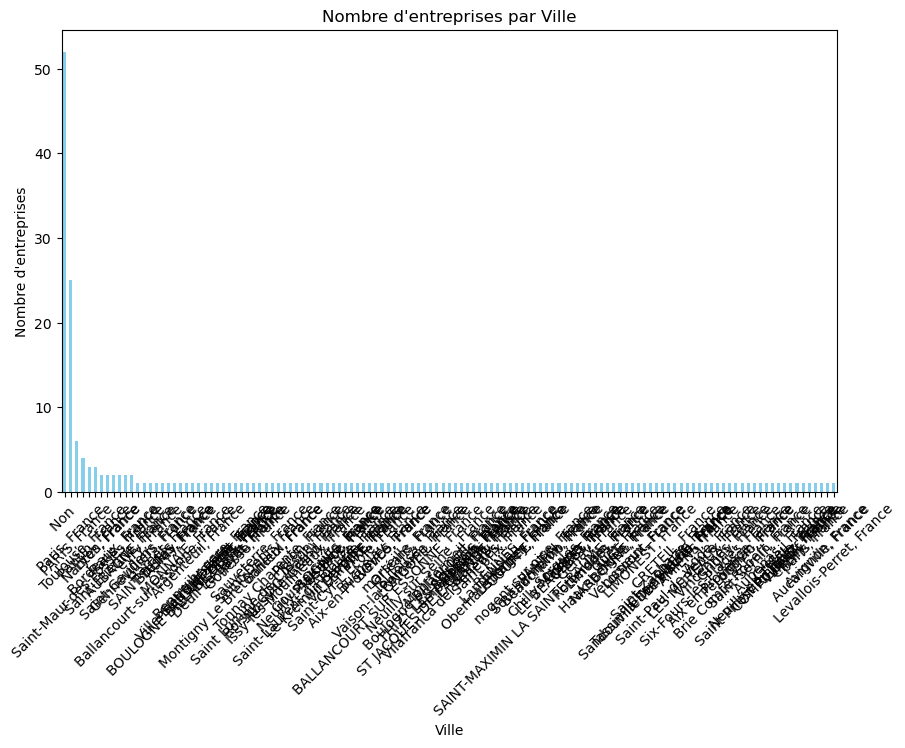

In [98]:
# classe de visualisation 

location_counts = df_entreprises['Location'].value_counts()
VisualisationGeneral.plot_bar_chart(location_counts)




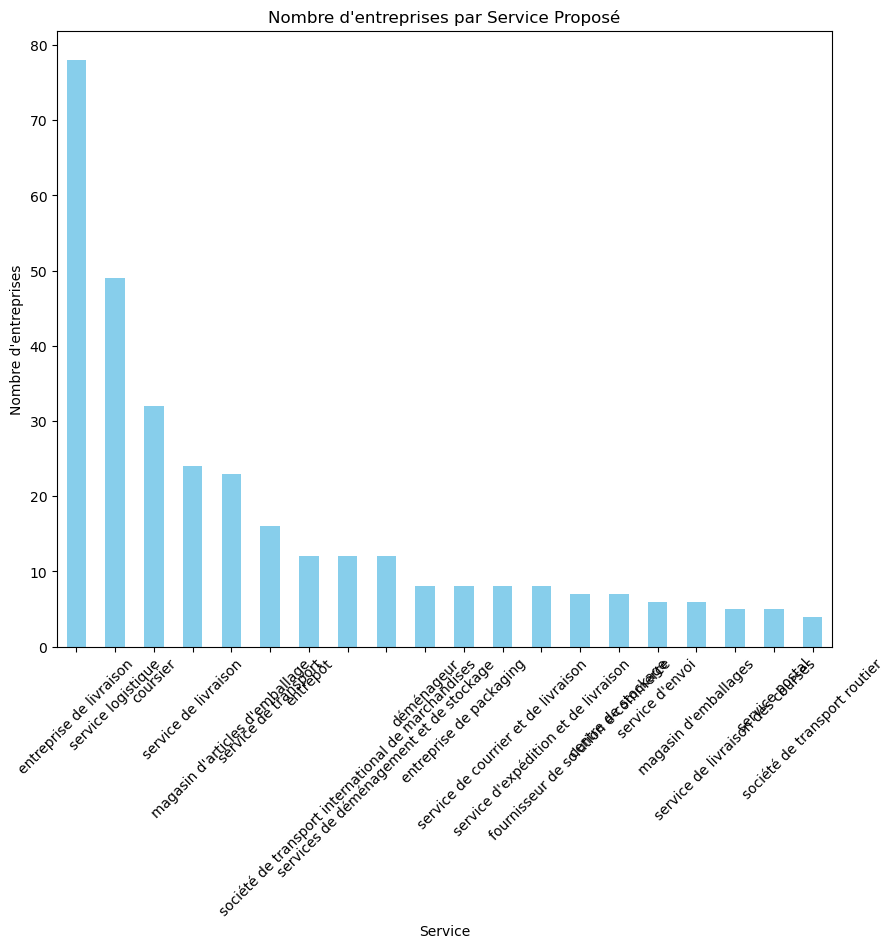

In [99]:
# ici on a besoin √† utiliser la transformed_df pour les colonnes ajout√© par One-hot Encoding 
# 20 top 20 entrprise  ayant le Nombre de services les plus utilis√©s √† afficher dans le diagramme
VisualisationGeneral.plot_bar_chart_services(transformed_df,20)


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


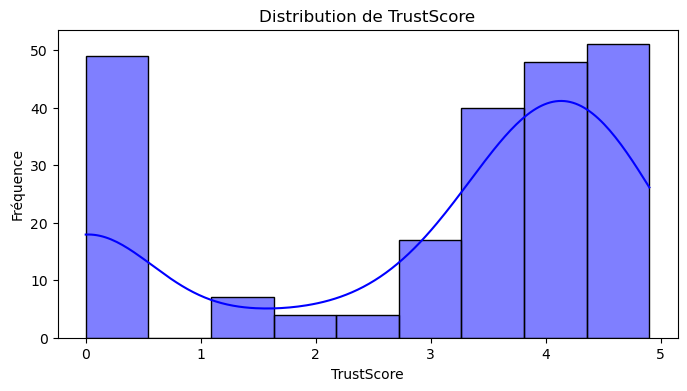

In [101]:
VisualisationGeneral.histogramme_trustScore(transformed_df['TrustScore']);

In [ ]:
# je garde le dataframe dans ficher csv df_Intreprise_preprocessing.csv .

In [102]:

transformed_df.to_csv('df_Intreprise_preprocessing.csv', index=False)

In [ ]:
### Partie concernant la deuxi√®me DataFrame : `avis.csv`

In [14]:
# Orginal data frame
df_avis = pd.read_csv("avis.csv")
display(df_avis.head())
display(df_avis.info())

display(df_avis.isna().sum())

Nom_Entreprise     Nom_Client  Nombre_avis Pays  Note  \
0             2ATPS         Agathe            1   FR     5   
1  2htransports.com  Alexandre Rif            2   FR     5   
2  2htransports.com        Game Lu            1   FR     5   
3  2htransports.com      SaYoSurMC            1   FR     5   
4  2htransports.com            S D            2   FR     1   

                       Date                                Titre_avis  \
0  2023-12-08T10:45:35.000Z                     Personnel r√©actif !!!   
1  2024-04-08T01:40:55.000Z  J'ai demand√© un transport pour aller de‚Ä¶   
2  2024-03-09T22:26:36.000Z             J'ai trouv√© cette soci√©t√© de‚Ä¶   
3  2023-02-16T23:30:42.000Z         Si vous recherchez un service de‚Ä¶   
4  2023-10-03T23:01:28.000Z   Ce Monsieur nous a flingu√© une mission‚Ä¶   

                                        Contenu_avis  \
0  Personnel r√©actif !!!! entreprise s√©rieuse qui...   
1  J'ai demand√© un transport pour aller de Paris ...   
2  J'ai trouv√© cette soci√©t√© de transporteur un p...   
3  Si vous recherchez un service de coursier prof...   
4  Ce Monsieur nous a flingu√© une mission humanit...   

                                    R√©ponse_Entrpris  
0                                                Non  
1                                                Non  
2                                                Non  
3                                                Non  
4  Bonjour MD,Je suis d√©sol√© d'entendre votre d√©c...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505129 entries, 0 to 505128
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Nom_Entreprise    505129 non-null  object
 1   Nom_Client        505118 non-null  object
 2   Nombre_avis       505129 non-null  int64 
 3   Pays              505128 non-null  object
 4   Note              505129 non-null  int64 
 5   Date              505129 non-null  object
 6   Titre_avis        505125 non-null  object
 7   Contenu_avis      505129 non-null  object
 8   R√©ponse_Entrpris  505129 non-null  object
dtypes: int64(2), object(7)
memory usage: 34.7+ MB


None

Nom_Entreprise       0
Nom_Client          11
Nombre_avis          0
Pays                 1
Note                 0
Date                 0
Titre_avis           4
Contenu_avis         0
R√©ponse_Entrpris     0
dtype: int64

# calsse cr√©ee AvisPreprocessor

## Description de la Classe `AvisPreprocessor`

La classe `AvisPreprocessor` est con√ßue pour pr√©traiter et transformer des donn√©es d'avis clients de mani√®re structur√©e et automatis√©e. H√©ritant de `BaseEstimator` et `TransformerMixin` de scikit-learn, cette classe s'int√®gre facilement dans des pipelines de traitement de donn√©es machine learning et permet une personnalisation √©tendue gr√¢ce √† ses m√©thodes modulaires. Elle offre des fonctionnalit√©s compl√®tes pour le nettoyage, la transformation et l'analyse des avis.

### Fonctionnalit√©s Principales

- **Nettoyage de Texte**: Les champs textuels tels que le nom de l'entreprise, le nom du client, le titre et le contenu de l'avis sont nettoy√©s pour enlever les caract√®res ind√©sirables et normaliser le texte, en utilisant la classe `EntreprisePreprocessor`.

- **Gestion des Valeurs Manquantes**: Les valeurs manquantes dans des colonnes cl√©s comme 'Pays' sont remplac√©es par une valeur par d√©faut ('Inconnu') pour maintenir l'int√©grit√© des donn√©es.

- **Extraction de Caract√©ristiques Temporelles**: Des caract√©ristiques telles que l'ann√©e, le mois, le jour de la semaine, et l'heure sont extraites √† partir des champs de date pour enrichir les donn√©es d'avis avec des informations temporelles qui pourraient influencer l'analyse des tendances.


- **D√©tection de Langue**: La langue du contenu de l'avis est d√©tect√©e pour filtrer les avis selon la langue cible (fran√ßais dans ce cas), ce qui est crucial pour les op√©rations de traitement de texte ult√©rieures qui d√©pendent de la langue.



# exemple d'application 


In [16]:
from Prepro_avis import AvisPreprocessor

# Cr√©ation de l'instance du pr√©processeur
preprocessor = AvisPreprocessor()
# Application de la m√©thode transform pour tester
df_avis = preprocessor.transform(df_avis)

display(df_avis.head())
display(df_avis.info())
display(df_avis.isna().sum())
## ce nest pas la peine de tester je telecharge la data frame produite lors de l'autoteste 

[nltk_data] Downloading package vader_lexicon to C:\Users\Youcef
[nltk_data]     Labib\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyboardInterrupt: 

In [17]:

df_avis = pd.read_csv("df_avis_Preprocessing1.csv")
display(df_avis.head())
display(df_avis.info())

display(df_avis.isna().sum())




Nom_Entreprise     Nom_Client  Nombre_avis Pays  Note  \
0          2atps         agathe            1   FR     5   
1   2htransports  alexandre rif            2   FR     5   
2   2htransports        game lu            1   FR     5   
3   2htransports      sayosurmc            1   FR     5   
4   2htransports            s d            2   FR     1   

                        Date                                Titre_avis  \
0  2023-12-08 10:45:35+00:00                     personnel r√©actif !!!   
1  2024-04-08 01:40:55+00:00  j'ai demand√© un transport pour aller de‚Ä¶   
2  2024-03-09 22:26:36+00:00             j'ai trouv√© cette soci√©t√© de‚Ä¶   
3  2023-02-16 23:30:42+00:00         si vous recherchez un service de‚Ä¶   
4  2023-10-03 23:01:28+00:00   ce monsieur nous a flingu√© une mission‚Ä¶   

                                        Contenu_avis  \
0  personnel r√©actif !!!! entreprise s√©rieuse qui...   
1  j'ai demand√© un transport pour aller de paris ...   
2  j'ai trouv√© cette soci√©t√© de transporteur un p...   
3  si vous recherchez un service de coursier prof...   
4  ce monsieur nous a flingu√© une mission humanit...   

                                    R√©ponse_Entrpris  year  month  weekday  \
0                                                Non  2023     12        4   
1                                                Non  2024      4        0   
2                                                Non  2024      3        5   
3                                                Non  2023      2        3   
4  Bonjour MD,Je suis d√©sol√© d'entendre votre d√©c...  2023     10        1   

   weekend  day  hour Langue  
0        0    8    10     fr  
1        0    8     1     fr  
2        1    9    22     fr  
3        0   16    23     fr  
4        0    3    23     fr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487824 entries, 0 to 487823
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Nom_Entreprise    487683 non-null  object
 1   Nom_Client        487756 non-null  object
 2   Nombre_avis       487824 non-null  int64 
 3   Pays              487824 non-null  object
 4   Note              487824 non-null  int64 
 5   Date              487824 non-null  object
 6   Titre_avis        487779 non-null  object
 7   Contenu_avis      487824 non-null  object
 8   R√©ponse_Entrpris  487824 non-null  object
 9   year              487824 non-null  int64 
 10  month             487824 non-null  int64 
 11  weekday           487824 non-null  int64 
 12  weekend           487824 non-null  int64 
 13  day               487824 non-null  int64 
 14  hour              487824 non-null  int64 
 15  Langue            487824 non-null  object
dtypes: int64(8), object(8)
memory usage: 

None

Nom_Entreprise      141
Nom_Client           68
Nombre_avis           0
Pays                  0
Note                  0
Date                  0
Titre_avis           45
Contenu_avis          0
R√©ponse_Entrpris      0
year                  0
month                 0
weekday               0
weekend               0
day                   0
hour                  0
Langue                0
dtype: int64


 ## Classe `TextMiningProcessus`
 **Nb:: Cette classe a besoin un data frame contient la clonne de serviceProposer afin que Latent Dirichlet Allocation (LDA) fonction:
 ** J'ai d√©ja fait un jointure avec data frame entreprise pour ajouetr ce colonne .
 ** la cellule suivante faite un description de la classe  et la celulle apres je vait alimenter cette classe un data frame ayant la colonne service proposer. 


## Description de la Classe `TextMiningProcessus`

La classe `TextMiningProcessus` est con√ßue  pour le traitement et l'analyse des avis clients. Elle offre une suite compl√®te de m√©thodes pour la pr√©paration des donn√©es textuelles, leur analyse et la transformation en informations utilisables pour des analyses plus pouss√©es ou pour alimenter des mod√®les de machine learning.

### Fonctionnalit√©s Principales

- **Analyse de Sentiment**: L'analyse de sentiment est r√©alis√©e sur le contenu de l'avis en utilisant l'outil VADER int√©gr√© √† NLTK, qui est particuli√®rement efficace pour les textes issus des r√©seaux sociaux en raison de sa sensibilit√© aux √©motic√¥nes et aux intensificateurs.

- ****Traitement des Emojis et les ponctuations****: Nettoie et pr√©pare les donn√©es textuelles pour l'analyse en extrayant les caract√©ristiques pertinentes telles que les emojis, les ponctuations, et en calculant diverses m√©triques textuelles.


- **Latent Dirichlet Allocation (LDA)**: Application de LDA pour la mod√©lisation de sujets afin d'identifier les th√®mes r√©currents dans les ensembles de textes, utile pour comprendre les aspects cl√©s discut√©s dans les avis.

### Avantages

- **Modularit√© et Extensibilit√©**: Gr√¢ce √† son architecture modulaire, cette classe peut √™tre facilement √©tendue ou adapt√©e pour inclure de nouvelles m√©thodes de pr√©traitement ou d'analyse, la rendant adaptable √† divers besoins analytiques.

- **Int√©gration Facile**: Con√ßue pour √™tre int√©gr√©e facilement avec d'autres outils de traitement de donn√©es en Python, facilitant ainsi la cr√©ation de pipelines de traitement de donn√©es robustes.

- **Efficacit√©**: Optimis√©e pour traiter efficacement de grandes quantit√©s de donn√©es textuelles, assurant une ex√©cution rapide m√™me avec des ensembles de donn√©es volumineux.


## Ponctuations dans les commentaires des clients

Les ponctuations dans les commentaires des clients jouent plusieurs r√¥les cruciaux dans l'analyse de texte, notamment en influen√ßant le ton, le rythme et l'√©motion exprim√©e.

Voici quelques fa√ßons dont les ponctuations peuvent √™tre utilis√©es en tant que feature engineering pour enrichir vos mod√®les de traitement du langage naturel (NLP) :

### 1. Ton et Sentiments

Les ponctuations peuvent influencer consid√©rablement l'interpr√©tation des sentiments et des √©motions dans un texte. Par exemple, les points d'exclamation peuvent indiquer un enthousiasme ou une urgence, tandis que les points d'interrogation peuvent sugg√©rer une incertitude ou une confusion. Utiliser ces caract√®res pour aider √† √©valuer le sentiment g√©n√©ral d'un commentaire peut √™tre tr√®s utile.

**Features potentielles :**

- **Comptage des points d'exclamation** : Nombre de points d'exclamation par commentaire pour mesurer l'intensit√© de l'√©motion.
- **Comptage des points d'interrogation** : Nombre de points d'interrogation pour √©valuer l'incertitude ou la curiosit√© du client.

### 2. Structure du Texte

Les ponctuations comme les virgules, les points-virgules et les deux-points jouent un r√¥le dans la structuration des phrases. Ils peuvent indiquer la complexit√© du texte et sont souvent utilis√©s pour clarifier le sens, s√©parer les √©l√©ments ou ajouter des informations suppl√©mentaires.

**Features potentielles :**

- **Ratio de ponctuations par mot** : Mesurer le ratio total de ponctuations par rapport au nombre de mots dans un commentaire pour √©valuer la complexit√© du texte.
- **Diversit√© des ponctuations** : √âvaluer le nombre de types diff√©rents de ponctuations utilis√©s, ce qui peut donner des indications sur le style d'√©criture ou le niveau d'√©ducation du client.

### 3. Pause et Emphase

Les ponctuations comme les ellipses (...) ou les tirets (-) peuvent indiquer une pause dans la pens√©e ou une emphase. Ces √©l√©ments peuvent √™tre particuli√®rement utiles pour comprendre comment les clients expriment leurs pens√©es ou leurs h√©sitations.

**Features potentielles :**

- **Fr√©quence des ellipses** : Compter le nombre d'ellipses dans les commentaires pour d√©tecter des pauses ou des prolongements dans le discours.
- **Fr√©quence des tirets** : Utilisation des tirets pour mesurer l'emphase ou l'ajout d'informations suppl√©mentaires.

### 4. Expression Informelle ou Urgente

L'utilisation r√©p√©t√©e de certaines ponctuations comme les points d'exclamation multiples (!!!) ou les combinaisons de points d'interrogation et d'exclamation (?! ou !?) peut indiquer un langage plus informel ou une expression urgente de sentiments.

**Features potentielles :**

- **S√©quences de ponctuations** : Identifier et compter les occurrences de s√©quences sp√©cifiques de ponctuations pour mesurer l'intensit√© √©motionnelle ou l'urgence.

## le nombre de mots √©crits en majuscules ou en minuscules

le nombre de mots √©crits en majuscules ou en minuscules peut jouer un r√¥le **significatif dans l'analyse des commentaires des client**, surtout dans le cadre de **l'analyse de sentiments** ou de **l'analyse de l'expression √©motionnelle**. Voici quelques points cl√©s sur l'impact de l'utilisation des majuscules et des minuscules dans les commentaires :

1.**Expression √âmotionnelle** : Les mots en majuscules sont souvent utilis√©s pour exprimer une forte √©motion. Par exemple, l'utilisation intensive de majuscules peut indiquer un cri ou une intensit√© √©lev√©e, ce qui est fr√©quent dans les expressions de col√®re, d'excitation, ou d'urgence.

2.**Accentuation** : Les mots en majuscules peuvent servir √† accentuer certains mots ou phrases, donnant un indice sur les aspects du produit ou du service que le client trouve particuli√®rement notables.

3.**Style de Communication** : L'usage des majuscules ou des minuscules peut aussi refl√©ter un style de communication particulier. Par exemple, certains clients peuvent √©crire en majuscules pour attirer l'attention sur leur commentaire, tandis que d'autres peuvent utiliser un style tout en minuscules pour une approche plus d√©contract√©e ou informelle.

4.**Analyse de Sentiments** : Les analyses de sentiments peuvent √™tre affin√©es en observant l'utilisation des majuscules. Des √©tudes ont montr√© que les commentaires avec un grand nombre de mots en majuscules peuvent souvent indiquer des sentiments extr√™mes, qu'ils soient positifs ou n√©gatifs.

## Feature Engineering pour l'Analyse des Commentaires

Pour exploiter ces observations dans l'analyse des donn√©es, voici quelques caract√©ristiques (features) que vous pourriez extraire et utiliser dans vos mod√®les de traitement automatique du langage naturel (NLP) :

1.**Compte des Mots en Majuscules** : Calculer le nombre de mots enti√®rement en majuscules dans chaque commentaire **pour mesurer l'intensit√© de l'expression**.

2.**Ratio de Mots en Majuscules** : √âvaluer le ratio de mots en majuscules par rapport au nombre total de mots pour **d√©tecter le niveau d'accentuation dans le texte**.

3.**Pr√©sence de Mots en Majuscules Sp√©cifiques** : Identifier et compter la fr√©quence de mots sp√©cifiques en majuscules **qui sont souvent associ√©s √† des sentiments forts ou √† des appels √† l'action**.

Ces caract√©ristiques peuvent √™tre int√©gr√©es dans des mod√®les d'apprentissage automatique pour **am√©liorer la compr√©hension et la classification des sentiments** et **des intentions derri√®re les commentaires des clients**.

## Les emojis peuvent apporter une dimension suppl√©mentaire de sentiment et d'√©motion dans le traitement du langage naturel (NLP)

Les emojis peuvent apporter une dimension suppl√©mentaire de sentiment et d'√©motion dans le traitement du langage naturel (NLP), notamment dans **les analyses de texte** o√π le contexte √©motionnel **est important**, comme l'analyse des sentiments sur les r√©seaux sociaux ou les avis clients. Voici quelques caract√©ristiques (features) que vous pourriez extraire des emojis pour enrichir vos mod√®les NLP :

**Fr√©quence des Emojis** :
-.**Nombre total d'emojis** : Compter le nombre total d'emojis dans un texte peut donner **une indication de l'expressivit√© √©motionnelle** ou de **l'enthousiasme de l'auteur**.
-.**Types d'emojis** : Compter le nombre de diff√©rents types d'emojis utilis√©s peut aider √† comprendre la diversit√© des expressions √©motionnelles.

**Emojis Sp√©cifiques** :
-.**Sentiments Positifs ou N√©gatifs** : Identifier et compter les emojis qui sont g√©n√©ralement associ√©s √† des sentiments positifs (üòä, ‚ù§Ô∏è) ou n√©gatifs (üò¢, üò†) pour aider √† d√©terminer le ton g√©n√©ral du texte.
-.**Emojis fr√©quemment utilis√©s** : Identifier les emojis les plus fr√©quemment utilis√©s peut r√©v√©ler des tendances dans l'expression des sentiments ou des r√©actions culturelles sp√©cifiques.

**Contexte des Emojis** :
-.**Position des Emojis dans le Texte** : Analyser o√π les emojis apparaissent dans le texte (d√©but, milieu, fin) pour voir comment ils pourraient influencer l'interpr√©tation du message entier.
-.**Association des Emojis avec des Mots** : Examiner les mots fr√©quemment utilis√©s √† proximit√© des emojis pour comprendre le contexte dans lequel ces emojis sont utilis√©s.

**Conversion des Emojis en Texte** :
-.**Texte Descriptif des Emojis** : Convertir les emojis en texte descriptif (par exemple, üòä en "visage souriant") pour permettre une analyse textuelle plus traditionnelle et incorporer cette information dans des mod√®les bas√©s sur du texte.

**Analyse de Sentiment avec Emojis** :
-.**Impact des Emojis sur le Sentiment** : √âvaluer comment la pr√©sence d'emojis affecte le sentiment per√ßu d'un message. Par exemple, un texte neutre pourrait √™tre per√ßu comme plus positif si accompagn√© d'emojis joyeux.

**Traits d'Emoji**:
-.**Cat√©gorisation des Emojis** : Classer les emojis selon des traits √©motionnels ou s√©mantiques (joie, tristesse, col√®re, surprise, etc.) et utiliser ces cat√©gories comme features pour le mod√®le.

Int√©grer ces caract√©ristiques dans vos mod√®les NLP peut aider **√† am√©liorer la compr√©hension du texte**, surtout dans les environnements o√π les nuances √©motionnelles sont cruciales pour l'interpr√©tation correcte du message.



******ATTESNTION*****
il sera n√©cessaire de modifier l'√©chelle des donn√©es, qui sont a priori assez diff√©rente

Pour utiliser un mod√®le de sentiment externe ou construire une liste personnalis√©e de sentiments associ√©s √† certains emojis, voici quelques approches possibles :
Utilisation d'un Mod√®le de Sentiment Externe

    API de Sentiment : Int√©grer une API externe comme Google Cloud Natural Language ou Microsoft Azure Text Analytics, qui peuvent analyser le sentiment de textes. Ces services peuvent traiter le texte des emojis converti pour en d√©duire un score de sentiment plus nuanc√©.

    Biblioth√®ques de Traitement du Langage Naturel : Utiliser des biblioth√®ques comme TextBlob ou VADER en Python, qui sont capables de fournir un score de sentiment directement √† partir du texte. Ces outils sont souvent pr√©-entra√Æn√©s sur des donn√©es volumineuses et peuvent offrir une bonne approximation du sentiment sans besoin de configuration suppl√©mentaire.

    python

    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

    def emoji_sentiment_vader(emoji_texts):
        analyzer = SentimentIntensityAnalyzer()
        sentiment_result = analyzer.polarity_scores(emoji_texts)
        return sentiment_result['compound']  # Retourne le score composite qui combine positif, n√©gatif et neutre

Construction d'une Liste Pr√©d√©finie Personnalis√©e

    Analyse Manuelle : Examiner manuellement une grande quantit√© de donn√©es contenant des emojis et leurs contextes pour d√©terminer les sentiments g√©n√©ralement associ√©s √† chaque emoji. Cela n√©cessite un effort significatif mais peut conduire √† des r√©sultats tr√®s adapt√©s √† vos donn√©es sp√©cifiques.

    Feedback Utilisateur : Collecter des feedbacks des utilisateurs sur ce qu'ils pensent que certains emojis repr√©sentent en termes de sentiments. Cela peut √™tre fait via des enqu√™tes o√π les utilisateurs sont invit√©s √† associer des sentiments √† des emojis.

    Exploitation des Ressources Existantes : Utiliser des recherches et des √©tudes existantes qui ont analys√© les sentiments des emojis. Par exemple, des √©tudes en psychologie ou en communication qui ont explor√© comment les gens interpr√®tent les emojis.

    Apprentissage Automatique : Cr√©er un mod√®le d'apprentissage automatique en utilisant comme caract√©ristiques les emojis et comme labels les sentiments exprim√©s dans les textes qui les accompagnent. Cela pourrait n√©cessiter de collecter un ensemble de donn√©es annot√© o√π chaque emoji est √©tiquet√© avec un sentiment.

In [ ]:
"""
# Jointure des DataFrames
df_entreprise_reduit=df_entreprise_reduit.rename(columns={'Entreprise':'Nom_Entreprise'})
df_entreprise_reduit.head()
# Jointure des DataFrames sur la colonne 'Entreprise'
df_combined = pd.merge(df_avis, df_entreprise_reduit, on='Nom_Entreprise', how='left')
# Afficher les informations du DataFrame combin√© pour v√©rifier la jointure
print(df_combined.info())
stoker la data frame  df_avis_jointure.csv
df_combined.to_csv('df_avis_jointure.csv', index=False)
"""

In [18]:
df_avis_Mdified = pd.read_csv("df_avis_jointure.csv")

In [20]:
display(df_avis_Mdified.head())
display(df_avis_Mdified.info())

Nom_Entreprise     Nom_Client  Nombre_avis Pays  Note  \
0          2atps         agathe            1   FR     5   
1   2htransports  alexandre rif            2   FR     5   
2   2htransports        game lu            1   FR     5   
3   2htransports      sayosurmc            1   FR     5   
4   2htransports            s d            2   FR     1   

                        Date                                Titre_avis  \
0  2023-12-08 10:45:35+00:00                     personnel r√©actif !!!   
1  2024-04-08 01:40:55+00:00  j'ai demand√© un transport pour aller de‚Ä¶   
2  2024-03-09 22:26:36+00:00             j'ai trouv√© cette soci√©t√© de‚Ä¶   
3  2023-02-16 23:30:42+00:00         si vous recherchez un service de‚Ä¶   
4  2023-10-03 23:01:28+00:00   ce monsieur nous a flingu√© une mission‚Ä¶   

                                        Contenu_avis  \
0  personnel r√©actif !!!! entreprise s√©rieuse qui...   
1  j'ai demand√© un transport pour aller de paris ...   
2  j'ai trouv√© cette soci√©t√© de transporteur un p...   
3  si vous recherchez un service de coursier prof...   
4  ce monsieur nous a flingu√© une mission humanit...   

                                    R√©ponse_Entrpris  year  month  weekday  \
0                                                Non  2023     12        4   
1                                                Non  2024      4        0   
2                                                Non  2024      3        5   
3                                                Non  2023      2        3   
4  Bonjour MD,Je suis d√©sol√© d'entendre votre d√©c...  2023     10        1   

   weekend  day  hour Langue  \
0        0    8    10     fr   
1        0    8     1     fr   
2        1    9    22     fr   
3        0   16    23     fr   
4        0    3    23     fr   

                                    ServicesProposes  
0  ['Service de livraison des courses', 'Service ...  
1  ['Coursier', 'Soci√©t√© de transport internation...  
2  ['Coursier', 'Soci√©t√© de transport internation...  
3  ['Coursier', 'Soci√©t√© de transport internation...  
4  ['Coursier', 'Soci√©t√© de transport internation...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487832 entries, 0 to 487831
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Nom_Entreprise    487691 non-null  object
 1   Nom_Client        487764 non-null  object
 2   Nombre_avis       487832 non-null  int64 
 3   Pays              487832 non-null  object
 4   Note              487832 non-null  int64 
 5   Date              487832 non-null  object
 6   Titre_avis        487787 non-null  object
 7   Contenu_avis      487832 non-null  object
 8   R√©ponse_Entrpris  487832 non-null  object
 9   year              487832 non-null  int64 
 10  month             487832 non-null  int64 
 11  weekday           487832 non-null  int64 
 12  weekend           487832 non-null  int64 
 13  day               487832 non-null  int64 
 14  hour              487832 non-null  int64 
 15  Langue            487832 non-null  object
 16  ServicesProposes  487832 non-null  ob

None

In [ ]:
# exmeple d'application de cette calsse ::
"""
df_avis_class_test = pd.read_csv("df_avis_jointure.csv")
text_processor = TextMiningProcessus(df_avis_class_test, 'Contenu_avis')
results = text_processor.preprocess_Data_Extraction(use_lda=True)
if isinstance(results, tuple):
    processed_df, lda_model = results  # S√©parer le DataFrame et le mod√®le LDA
else:
    processed_df = results  # Aucun mod√®le LDA retourn√©, seul le DataFrame est retourn√©

# Maintenant vous pouvez utiliser la m√©thode head() sur le DataFrame correctement
print(processed_df.head())
processed_df.to_csv('df_avis_TexteMining.csv', index=False)
"""

In [ ]:
# continuation avec l'output de la classe :::: df_avis_TexteMining.csv

In [21]:
df_avis2 = pd.read_csv("df_avis_TexteMining.csv")
display(df_avis2.head())
display(df_avis2.info())

display(df_avis2.isna().sum())

Nom_Entreprise     Nom_Client  Nombre_avis Pays  Note  \
0          2atps         agathe            1   FR     5   
1   2htransports  alexandre rif            2   FR     5   
2   2htransports        game lu            1   FR     5   
3   2htransports      sayosurmc            1   FR     5   
4   2htransports            s d            2   FR     1   

                        Date                                Titre_avis  \
0  2023-12-08 10:45:35+00:00                     personnel r√©actif !!!   
1  2024-04-08 01:40:55+00:00  j'ai demand√© un transport pour aller de‚Ä¶   
2  2024-03-09 22:26:36+00:00             j'ai trouv√© cette soci√©t√© de‚Ä¶   
3  2023-02-16 23:30:42+00:00         si vous recherchez un service de‚Ä¶   
4  2023-10-03 23:01:28+00:00   ce monsieur nous a flingu√© une mission‚Ä¶   

                                        Contenu_avis  \
0  personnel r√©actif !!!! entreprise s√©rieuse qui...   
1  j'ai demand√© un transport pour aller de paris ...   
2  j'ai trouv√© cette soci√©t√© de transporteur un p...   
3  si vous recherchez un service de coursier prof...   
4  ce monsieur nous a flingu√© une mission humanit...   

                                    R√©ponse_Entrpris  year  ...  quotes  \
0                                                Non  2023  ...       0   
1                                                Non  2024  ...       3   
2                                                Non  2024  ...       1   
3                                                Non  2023  ...       5   
4  Bonjour MD,Je suis d√©sol√© d'entendre votre d√©c...  2023  ...       4   

   parentheses  combined_punctuation  uppercase_words  lowercase_words  \
0            0                     0                0               11   
1            0                     0                0               22   
2            0                     0                0               24   
3            0                     0                0              103   
4            0                     0                0              184   

  uppercase_ratio lowercase_ratio  \
0             0.0        0.916667   
1             0.0        1.000000   
2             0.0        1.000000   
3             0.0        0.990385   
4             0.0        0.978723   

                                              topics dominant_topic_id  \
0  [(0, 0.015919503), (1, 0.43787825), (2, 0.1280...                 1   
1  [(0, 0.3877065), (1, 0.39804453), (4, 0.196680...                 1   
2  [(0, 0.36660075), (1, 0.4849809), (2, 0.047657...                 1   
3  [(0, 0.40743735), (1, 0.36786553), (3, 0.17513...                 0   
4  [(0, 0.4306029), (1, 0.45975393), (2, 0.077174...                 1   

                              dominant_service_topic  
0  ['Magasin de mat√©riel de camping', 'Service lo...  
1  ['Magasin de mat√©riel de camping', 'Service lo...  
2  ['Magasin de mat√©riel de camping', 'Service lo...  
3  ['Magasin de mat√©riel de camping', 'Service lo...  
4  ['Magasin de mat√©riel de camping', 'Service lo...  

[5 rows x 41 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487832 entries, 0 to 487831
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Nom_Entreprise          487691 non-null  object 
 1   Nom_Client              487764 non-null  object 
 2   Nombre_avis             487832 non-null  int64  
 3   Pays                    487832 non-null  object 
 4   Note                    487832 non-null  int64  
 5   Date                    487832 non-null  object 
 6   Titre_avis              487787 non-null  object 
 7   Contenu_avis            487832 non-null  object 
 8   R√©ponse_Entrpris        487832 non-null  object 
 9   year                    487832 non-null  int64  
 10  month                   487832 non-null  int64  
 11  weekday                 487832 non-null  int64  
 12  weekend                 487832 non-null  int64  
 13  day                     487832 non-null  int64  
 14  hour               

None

Nom_Entreprise               141
Nom_Client                    68
Nombre_avis                    0
Pays                           0
Note                           0
Date                           0
Titre_avis                    45
Contenu_avis                   0
R√©ponse_Entrpris               0
year                           0
month                          0
weekday                        0
weekend                        0
day                            0
hour                           0
Langue                         0
ServicesProposes               0
text_sentiment                 0
emojis                    476297
emoji_text                476297
emoji_sentiment                0
emoji_counts                   0
emoji_ratio                    0
emoji_diversity                0
punctuations              131487
exclamation_marks              0
question_marks                 0
exclamation_ratio              0
question_ratio                 0
ellipsis                       0
exclamati

In [ ]:
##QQ afficahge :::

In [22]:
display(df_avis2['Pays'].value_counts())

Pays
FR     460497
Non      5720
BE       3467
RE       2240
CH       1788
        ...  
VU          1
PR          1
GG          1
JE          1
SO          1
Name: count, Length: 178, dtype: int64

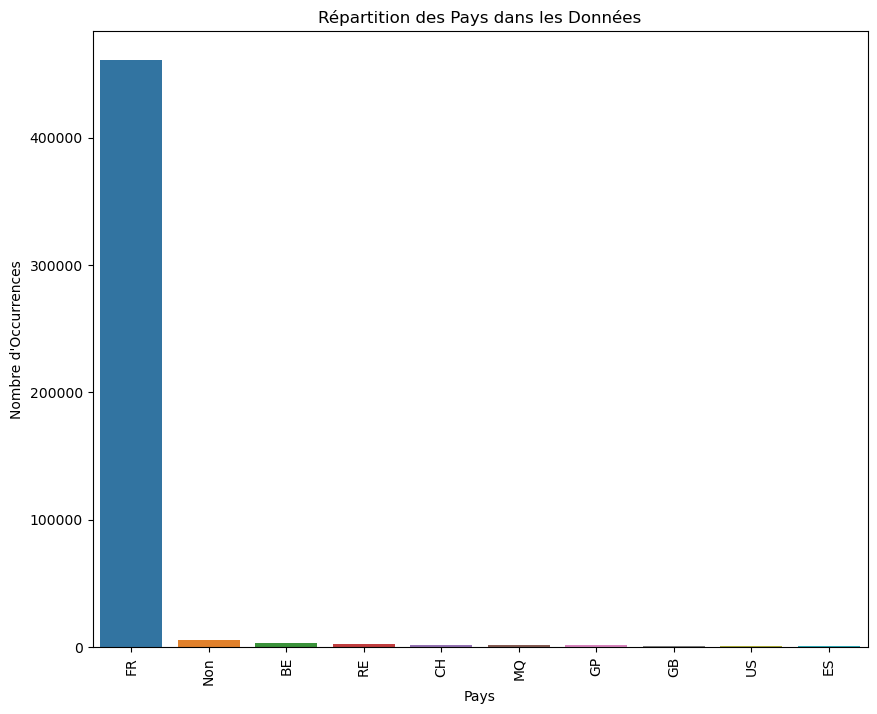

In [76]:
#Visualisation

 # Histogramme pour pays
VisualisationGeneral.diagramme_Pays(df_avis2['Pays'],10)


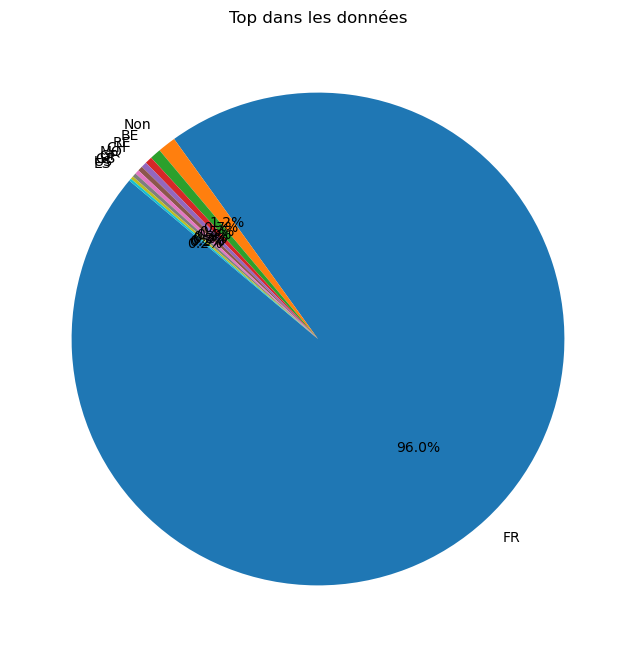

In [78]:
 # Pie_Chart_Pays
VisualisationGeneral.Pie_Chart_Pays(df_avis2['Pays'],10)


In [31]:
print(df_avis2["emoji_sentiment"].unique())

print(df_avis2["emojis"].unique())
print(df_avis2["emoji_counts"])
print(df_avis2["emoji_diversity"].unique())

[ 0.     -0.34    0.5574 -0.5859  0.3182  0.7096  0.8591 -0.875  -0.93
 -0.9451 -0.7351 -0.8176 -0.9081 -0.2263 -0.7579 -0.3612 -0.4939 -0.8225]
[nan 'üåüüåüüåüüåüüåü' 'üëåüôè' ... 'üëèüí™' 'üëåüëçüëè' 'ü§óüòÉüëçüôèüôèüòçüëåüëã']
0         Counter()
1         Counter()
2         Counter()
3         Counter()
4         Counter()
            ...    
487827    Counter()
487828    Counter()
487829    Counter()
487830    Counter()
487831    Counter()
Name: emoji_counts, Length: 487832, dtype: object
[ 0  1  2  3  4  5  6  8  7 10 13  9 20 11]


In [24]:
display(df_avis2['Langue'].unique())

array(['fr'], dtype=object)

In [32]:
df_avis2['Contenu_avis'].isna().sum()

0

In [35]:
df_avis2["emoji_diversity"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  8,  7, 10, 13,  9, 20, 11],
      dtype=int64)

In [33]:
df_avis2[df_avis2["emoji_diversity"]==11]

Nom_Entreprise Nom_Client  Nombre_avis Pays  Note  \
367964  mondial relay      jimmy            4  Non     5   

                             Date                              Titre_avis  \
367964  2023-12-29 12:49:14+00:00  8,9/10 satisfaisant et globalement pro   

                                             Contenu_avis R√©ponse_Entrpris  \
367964  üü¢ tr√®s bien :‚Ä¢ prix du service ‚úÖ‚Ä¢ impression (...              Non   

        year  ...  quotes  parentheses  combined_punctuation  uppercase_words  \
367964  2023  ...       0           22                     0                0   

        lowercase_words uppercase_ratio lowercase_ratio  \
367964              368             0.0        0.960836   

                                                   topics dominant_topic_id  \
367964  [(0, 0.50503224), (1, 0.35493782), (2, 0.02111...                 0   

                                   dominant_service_topic  
367964  ['Magasin de mat√©riel de camping', 'Service lo...  

[1 rows x 41 columns]

In [34]:
for text in df_avis2[df_avis2["emoji_diversity"] == 11]["Contenu_avis"]:
    print(text)

üü¢ tr√®s bien :‚Ä¢ prix du service ‚úÖ‚Ä¢ impression (autocollante üîù) du bon de livraison/transport,au point relais (pas besoin d‚Äôimprimante) ‚úÖ‚Ä¢ syst√®me de commer√ßant point relais ‚úÖ‚Ä¢ proximit√© et horaires d‚Äôouverture du relais ‚úÖüü° √† am√©liorer : ‚Ä¢ conna√Ætre l‚Äôheure √† laquelle partent les colis du relais üÜô‚¨ÜÔ∏è (afin d‚Äô√™tre plus pr√©cis et plus rapide pour d√©poser un colis et pour qu‚Äôil soit r√©ceptionn√©,cela serait beaucoup plus efficient) (attention de trouver et de veiller √† conserver la s√©curit√© maximale en cas d‚Äôhoraires connus ) ‚Ä¢ conna√Ætre avec pr√©cision le trajet du colis üì¶ en temps r√©el üÜô‚¨ÜÔ∏è(balise gps des camions de transport)‚Ä¢ le livreur devrait prendre une photo (malgr√© le temps que cela repr√©sente surtout dans ce c≈ìur de m√©tier, ou la rapidit√© est de mise) de chaque colis lorsqu‚Äôil les prend en charge au point relais,et apr√®s qu‚Äôil les ai transport√©s,il devrait reprendre une autre photo au moment du d

In [37]:
for text in df_avis2[df_avis2["emoji_diversity"] == 11]["emoji_text"]:
    print(text)

green_circle check_mark_button TOP_arrow check_mark_button check_mark_button check_mark_button yellow_circle UP!_button up_arrow package UP!_button up_arrow UP!_button up_arrow red_circle thinking_face exclamation_question_mark thinking_face exclamation_question_mark thinking_face exclamation_question_mark 


In [38]:
for text in df_avis2[df_avis2["emoji_diversity"] == 11]["emoji_sentiment"]:
    print(text)

0.0


In [39]:
print(df_avis[df_avis2["emoji_diversity"] == 11]["Note"])

367964    3
Name: Note, dtype: int64


C:\Users\Youcef Labib\AppData\Local\Temp\ipykernel_7072\3611444452.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_avis[df_avis2["emoji_diversity"] == 11]["Note"])


In [40]:
print(df_avis2[df_avis2["emoji_diversity"] == 11]["ServicesProposes"])
for text in df_avis2[df_avis2["emoji_diversity"] == 11]["ServicesProposes"]:
    print(text)

print(df_avis2[df_avis2["emoji_diversity"] == 11]["Nom_Entreprise"])

367964    ['Coursier', 'Coursier']
Name: ServicesProposes, dtype: object
['Coursier', 'Coursier']
367964    mondial relay
Name: Nom_Entreprise, dtype: object


In [45]:
print(df_avis2[df_avis2["emoji_diversity"] == 20]["topics"])
for text in df_avis2[df_avis2["emoji_diversity"] == 20]["dominant_service_topic"]:
    print(text)
## Nb::: A verfier  ????

print(df_avis2[df_avis2["emoji_diversity"] == 20]["ServicesProposes"])

for text in df_avis2[df_avis2["emoji_diversity"] == 20]["ServicesProposes"]:
    print(text)

331673    [(0, 0.42871103), (1, 0.5623346)]
Name: topics, dtype: object
['Magasin de mat√©riel de camping', 'Service logistique', 'Magasin de v√™tements professionnels', "Magasin d'√©quipements et accessoires pour la police", "Magasin de v√™tements et d'articles de plein air", 'Service e-commerce', 'Magasin de mat√©riel de camping', 'Service logistique', 'Magasin de v√™tements professionnels', "Magasin d'√©quipements et accessoires pour la police", "Magasin de v√™tements et d'articles de plein air", 'Service e-commerce']
331673    ['Coursier', 'Coursier']
Name: ServicesProposes, dtype: object
['Coursier', 'Coursier']


In [41]:
print(df_avis2[df_avis2["emoji_diversity"] == 20]["emoji_sentiment"])
print(df_avis2[df_avis2["emoji_diversity"] == 20]["Note"])

331673    0.0
Name: emoji_sentiment, dtype: float64
331673    1
Name: Note, dtype: int64


## Description de la Classe `Analayse_Sentiment_Processus`
Cette calsse est une classe pr√©partoire pour faire les annalyse de sentiement ut√©rieurs 
l'inut de cette classe et la df produit dans l'etape pr√©cedente:::


## Description de la Classe `Analayse_Sentiment_Processus`

La classe `Analayse_Sentiment_Processus` est con√ßue pour le traitement approfondi des textes, sp√©cialement dans le contexte des avis clients. Elle int√®gre plusieurs techniques de traitement du langage naturel (NLP) pour nettoyer, analyser et transformer le texte en donn√©es num√©riques exploitables par des mod√®les d'apprentissage automatique.

### Fonctionnalit√©s Principales

- **Nettoyage et Pr√©traitement** : La classe pr√©pare les donn√©es textuelles en nettoyant et en extrayant des caract√©ristiques pertinentes comme les emojis et les ponctuations. Elle convertit √©galement les donn√©es textuelles en formats plus simples et homog√®nes pour faciliter les analyses ult√©rieures.

- **Analyse de Sentiment** : Utilise le module `VADER` de NLTK pour analyser le sentiment des avis, fournissant une √©valuation quantitative du sentiment exprim√© dans les textes.

- **Traitement des Emojis** : Les emojis sont extraits et convertis en texte pour une analyse de sentiment sp√©cifique, reconnaissant leur importance croissante dans la communication num√©rique.

- **Extraction de Caract√©ristiques Textuelles** : La classe extrait des caract√©ristiques suppl√©mentaires telles que le nombre et la diversit√© des emojis, la pr√©sence de ponctuations sp√©cifiques, et les ratios d'utilisation des majuscules par rapport aux minuscules, enrichissant ainsi le dataset avec des informations qui peuvent √™tre cruciales pour certaines analyses.

- **Vectorisation** : Transforme le texte nettoy√© en vecteurs num√©riques √† l'aide de `TfidfVectorizer`, permettant ainsi l'utilisation des donn√©es dans des mod√®les statistiques ou de machine learning.

### M√©thodes Importantes

- `initialize_emoji_and_punctuation_columns()`: Pr√©pare les colonnes pour les emojis et les ponctuations.
  
- `update_stop_words()`: √âtend la liste des mots √† exclure en incluant les emojis, les ponctuations et les chiffres, adaptant ainsi les stop words au contexte sp√©cifique des donn√©es trait√©es.

- `token()`: R√©alise la tokenisation des avis, en excluant les mots non pertinents et en pr√©parant le texte pour l'analyse de sentiment.

- `reconstruct_sentences()`: Reconstruit les phrases √† partir des tokens pour faciliter certaines formes d'analyses qui n√©cessitent le format de phrase complet.

- `apply_stem_or_lemma(use_stemming)`: Applique le stemming ou la lemmatisation pour r√©duire les mots √† leur racine, facilitant une comparaison plus uniforme entre les diff√©rents usages des mots.

- `vectorize_text()`: Convertit les donn√©es textuelles trait√©es en vecteurs TF-IDF, une √©tape essentielle pour de nombreux algorithmes de machine learning.

### Exemple d'Utilisation

```python
df_avis = pd.read_csv("df_avis_TexteMining.csv")
print(df_avis.head())
sentiment_analyzer = Analayse_Sentiment_Processus(df_avis, 'Contenu_avis')
df_modified = sentiment_analyzer.preprocess_and_vectorize(use_stemming=True)
print(df_modified.head())
df_modified.to_csv('df_avis_AnalyseSentiment.csv', index=False)

In [53]:
# je commence ma presentation sur l"effets de cette classe seulement df stok√© lors de l'etape de autoteste 

df_avis_Annalys= pd.read_csv("df_avis_AnalyseSentiment.csv")
display(df_avis_Annalys.head())
display(df_avis_Annalys.info())

display(df_avis_Annalys.isna().sum())

Nom_Entreprise     Nom_Client  Nombre_avis Pays  Note  \
0          2atps         agathe            1   FR     5   
1   2htransports  alexandre rif            2   FR     5   
2   2htransports        game lu            1   FR     5   
3   2htransports      sayosurmc            1   FR     5   
4   2htransports            s d            2   FR     1   

                        Date                                Titre_avis  \
0  2023-12-08 10:45:35+00:00                     personnel r√©actif !!!   
1  2024-04-08 01:40:55+00:00  j'ai demand√© un transport pour aller de‚Ä¶   
2  2024-03-09 22:26:36+00:00             j'ai trouv√© cette soci√©t√© de‚Ä¶   
3  2023-02-16 23:30:42+00:00         si vous recherchez un service de‚Ä¶   
4  2023-10-03 23:01:28+00:00   ce monsieur nous a flingu√© une mission‚Ä¶   

                                        Contenu_avis  \
0  personnel r√©actif !!!! entreprise s√©rieuse qui...   
1  j'ai demand√© un transport pour aller de paris ...   
2  j'ai trouv√© cette soci√©t√© de transporteur un p...   
3  si vous recherchez un service de coursier prof...   
4  ce monsieur nous a flingu√© une mission humanit...   

                                    R√©ponse_Entrpris  year  ...  \
0                                                Non  2023  ...   
1                                                Non  2024  ...   
2                                                Non  2024  ...   
3                                                Non  2023  ...   
4  Bonjour MD,Je suis d√©sol√© d'entendre votre d√©c...  2023  ...   

   lowercase_words  uppercase_ratio  lowercase_ratio  \
0               11              0.0         0.916667   
1               22              0.0         1.000000   
2               24              0.0         1.000000   
3              103              0.0         0.990385   
4              184              0.0         0.978723   

                                              topics  dominant_topic_id  \
0  [(0, 0.015919503), (1, 0.43787825), (2, 0.1280...                  1   
1  [(0, 0.3877065), (1, 0.39804453), (4, 0.196680...                  1   
2  [(0, 0.36660075), (1, 0.4849809), (2, 0.047657...                  1   
3  [(0, 0.40743735), (1, 0.36786553), (3, 0.17513...                  0   
4  [(0, 0.4306029), (1, 0.45975393), (2, 0.077174...                  1   

                              dominant_service_topic  \
0  ['Magasin de mat√©riel de camping', 'Service lo...   
1  ['Magasin de mat√©riel de camping', 'Service lo...   
2  ['Magasin de mat√©riel de camping', 'Service lo...   
3  ['Magasin de mat√©riel de camping', 'Service lo...   
4  ['Magasin de mat√©riel de camping', 'Service lo...   

                                              tokens  \
0  ['personnel', 'r√©actif', 'entreprise', 's√©rieu...   
1  ['demand√©', 'transport', 'aller', 'paris', 'ly...   
2  ['trouv√©', 'cette', 'soci√©t√©', 'transporteur',...   
3  ['recherchez', 'service', 'coursier', 'profess...   
4  ['monsieur', 'flingu√©', 'mission', 'humanitair...   

                                       reconstructed  \
0  personnel r√©actif entreprise s√©rieuse respecte...   
1  demand√© transport aller paris lyon bien pass√© ...   
2  trouv√© cette soci√©t√© transporteur hasard satis...   
3  recherchez service coursier professionnel abor...   
4  monsieur flingu√© mission humanitaire maroc d√©p...   

                                             stemmed  \
0  ['personnel', 'r√©actif', 'entrepris', 's√©rieux...   
1  ['demand', 'transport', 'aller', 'paris', 'lyo...   
2  ['trouv', 'cet', 'societ', 'transporteur', 'ha...   
3  ['recherch', 'servic', 'coursi', 'professionne...   
4  ['monsieur', 'flingu', 'mission', 'humanitair'...   

                                          vectorized  
0  [0.         0.         0.         0.         0...  
1  [0.         0.         0.         0.         0...  
2  [0.         0.         0.         0.         0...  
3  [0.         0.         0.19259367 0.         0...  
4  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487832 entries, 0 to 487831
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Nom_Entreprise          487691 non-null  object 
 1   Nom_Client              487764 non-null  object 
 2   Nombre_avis             487832 non-null  int64  
 3   Pays                    487832 non-null  object 
 4   Note                    487832 non-null  int64  
 5   Date                    487832 non-null  object 
 6   Titre_avis              487787 non-null  object 
 7   Contenu_avis            487832 non-null  object 
 8   R√©ponse_Entrpris        487832 non-null  object 
 9   year                    487832 non-null  int64  
 10  month                   487832 non-null  int64  
 11  weekday                 487832 non-null  int64  
 12  weekend                 487832 non-null  int64  
 13  day                     487832 non-null  int64  
 14  hour               

None

Nom_Entreprise               141
Nom_Client                    68
Nombre_avis                    0
Pays                           0
Note                           0
Date                           0
Titre_avis                    45
Contenu_avis                   0
R√©ponse_Entrpris               0
year                           0
month                          0
weekday                        0
weekend                        0
day                            0
hour                           0
Langue                         0
ServicesProposes               0
text_sentiment                 0
emojis                         0
emoji_text                476297
emoji_sentiment                0
emoji_counts                   0
emoji_ratio                    0
emoji_diversity                0
punctuations                   0
exclamation_marks              0
question_marks                 0
exclamation_ratio              0
question_ratio                 0
ellipsis                       0
exclamati

In [108]:
df_avis_Annalys[df_avis_Annalys['Nom_Entreprise']=='ID Logistics']

Empty DataFrame
Columns: [Nom_Entreprise, Nom_Client, Nombre_avis, Pays, Note, Date, Titre_avis, Contenu_avis, R√©ponse_Entrpris, year, month, weekday, weekend, day, hour, Langue, ServicesProposes, text_sentiment, emojis, emoji_text, emoji_sentiment, emoji_counts, emoji_ratio, emoji_diversity, punctuations, exclamation_marks, question_marks, exclamation_ratio, question_ratio, ellipsis, exclamation_series, quotes, parentheses, combined_punctuation, uppercase_words, lowercase_words, uppercase_ratio, lowercase_ratio, topics, dominant_topic_id, dominant_service_topic, tokens, reconstructed, stemmed, vectorized]
Index: []

[0 rows x 45 columns]

In [54]:
# Fonction pour v√©rifier si 'livraison' est dans la liste des services
def has_livraison(service_list):
    return 'livraison' in service_list

# Filtrer le DataFrame pour obtenir uniquement les entreprises offrant le service de livraison
filtered_df = df_avis_Annalys[df_avis_Annalys['ServicesProposes'].apply(has_livraison)]



In [55]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194184 entries, 0 to 487618
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Nom_Entreprise          194184 non-null  object 
 1   Nom_Client              194156 non-null  object 
 2   Nombre_avis             194184 non-null  int64  
 3   Pays                    194184 non-null  object 
 4   Note                    194184 non-null  int64  
 5   Date                    194184 non-null  object 
 6   Titre_avis              194159 non-null  object 
 7   Contenu_avis            194184 non-null  object 
 8   R√©ponse_Entrpris        194184 non-null  object 
 9   year                    194184 non-null  int64  
 10  month                   194184 non-null  int64  
 11  weekday                 194184 non-null  int64  
 12  weekend                 194184 non-null  int64  
 13  day                     194184 non-null  int64  
 14  hour                    

In [56]:
filtered_df['Nom_Entreprise'].unique()

array(['2atps', '2htransports', 'ags d√©m√©nagement', 'akaz',
       'apero le mans', 'asntransport paris', 'atradem',
       'ava d√©m√©nagement', 'axal', 'best demenagements',
       'bonjour demenagement', 'bring4you', 'byebyecolis', 'cafeographe',
       'cliquezpostez', 'cocolis', 'colicoli', 'colis affranchis',
       'colisexpat', 'coursier-moto', 'crogo', 'delight cbd', 'demeclic',
       'demeco horizon demenagement et garde- meuble',
       'demenagement lefebvre', 'demenageur', 'demepool', 'demtrans i2s',
       'dpd', 'd√©m√©nagement service', 'd√©m√©nagementgabin',
       'd√©m√©nagements j√©z√©quel', 'd√©m√©nager malin', 'edilink',
       'excello mobilis d√©m√©nagement', 'famileat', 'fideliv', 'fraise',
       'fretbay', 'frichti', 'gls france', 'go pilot', 'green kartel',
       'happy-post', 'hoplunch', 'jenlevejelivre', 'kingbox', 'koulier',
       "l'officiel du d√©m√©nagement", 'la bigbox', 'la tourn√©e',
       'les d√©m√©nageurs bretons', 'lessaveursdenoemie', 'le

In [57]:
# Liste des noms d'entreprises √† filtrer
entreprises = ['cocolis', 'colisexpat', 'colicoli', 'stls - soci√©t√© de transport']

# Filtrer le DataFrame pour inclure uniquement les entreprises sp√©cifi√©es
df_clois = filtered_df[filtered_df['Nom_Entreprise'].isin(entreprises)]

# Afficher le DataFrame r√©sultant


In [58]:
df_clois.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51930 entries, 153097 to 210758
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nom_Entreprise          51930 non-null  object 
 1   Nom_Client              51914 non-null  object 
 2   Nombre_avis             51930 non-null  int64  
 3   Pays                    51930 non-null  object 
 4   Note                    51930 non-null  int64  
 5   Date                    51930 non-null  object 
 6   Titre_avis              51919 non-null  object 
 7   Contenu_avis            51930 non-null  object 
 8   R√©ponse_Entrpris        51930 non-null  object 
 9   year                    51930 non-null  int64  
 10  month                   51930 non-null  int64  
 11  weekday                 51930 non-null  int64  
 12  weekend                 51930 non-null  int64  
 13  day                     51930 non-null  int64  
 14  hour                    51930 non-nu

In [ ]:
## Nb::: quand je reconstruit les phrase apres avoir supprimer les mot vide :::: il prduite reconstructed  77 nan
# en fait, j'ai utiliser la technique de regressionExp pour limiter aux mot plus de 4 lettre  ::::::!!!! (a v√©rifier par la suite !!)

In [58]:
print("\n Contenu_avis \n ")
for text in df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["Contenu_avis"]:
    print(text)

print("\n tokens \n ")
for text in df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["tokens"]:
    print(text)
print("\n reconstructed \n ")
for text in df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["reconstructed"]:
    print(text)
    

print(df_avis2[df_avis2["emoji_diversity"] == 20]["Note"])
print(df_avis2[df_avis2["emoji_diversity"] == 20]["text_sentiment"]) 


print("\n stemmed  \n ")
for text in df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["stemmed"]:
    print(text)

print("\n ServicesProposes  \n ")
for text in df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["ServicesProposes"]:
    print(text)
print("\n emoji_sentiment  \n ")
print(df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["emoji_sentiment"])

print("\n topics  \n ")
print(df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["topics"])
for text in df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["topics"]:
    print(text)
print("\n dominant_service_topic  \n ")
for text in df_avis_Annalys[df_avis_Annalys["emoji_diversity"] == 20]["dominant_service_topic"]:
    print(text)



 Contenu_avis 
 
service vraiment lamentable, le courrier arrivait plus vite au 20√®me si√®cle!!! la poste veut faire banque et assurance alors qu'elle ne ma√Ætrise pas son vrai m√©tier, √† savoir livrer du courrier. l'etat va lui donner plus d'un milliard d'euros et les timbres vont augmenter, alors que le j+2 passe en j+3!!!!! c'est honteux !!!!!!!!!!!!!! je pense faire appel √† des messagers √† cheval ou √©lever des pigeons voyageurs pour leur faire concurrence üòÅü§£üòµüò¨üò≠üòíü•¥ü•≥ü§Øü§íüò∑ü§ïü§¢ü§Æü§ßü•µü•∂ü§êü§™üôÉ

 tokens 
 
['service', 'vraiment', 'lamentable', 'courrier', 'arrivait', 'plus', 'vite', '20√®me', 'si√®cle', 'poste', 'veut', 'faire', 'banque', 'assurance', 'alors', 'ma√Ætrise', 'vrai', 'm√©tier', 'savoir', 'livrer', 'courrier', 'etat', 'donner', 'plus', 'milliard', 'euros', 'timbres', 'vont', 'augmenter', 'alors', 'passe', 'honteux', 'pense', 'faire', 'appel', 'messagers', 'cheval', '√©lever', 'pigeons', 'voyageurs', 'faire', 'concurrence']

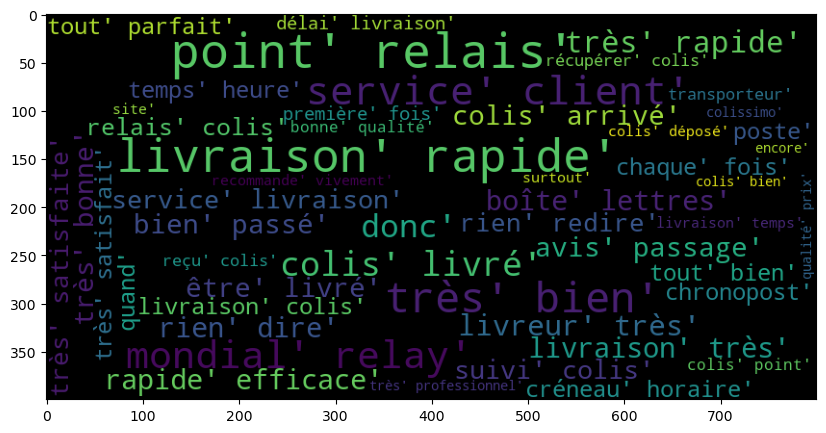

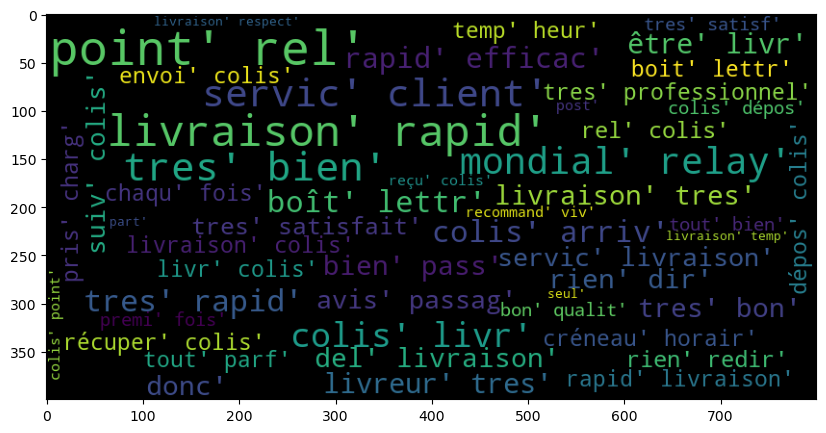

In [62]:
from VisualisationMap import VisualisationGeneral
VisualisationGeneral.plot_word_cloud(df_avis_Annalys, 'tokens')
VisualisationGeneral.plot_word_cloud(df_avis_Annalys, 'stemmed')

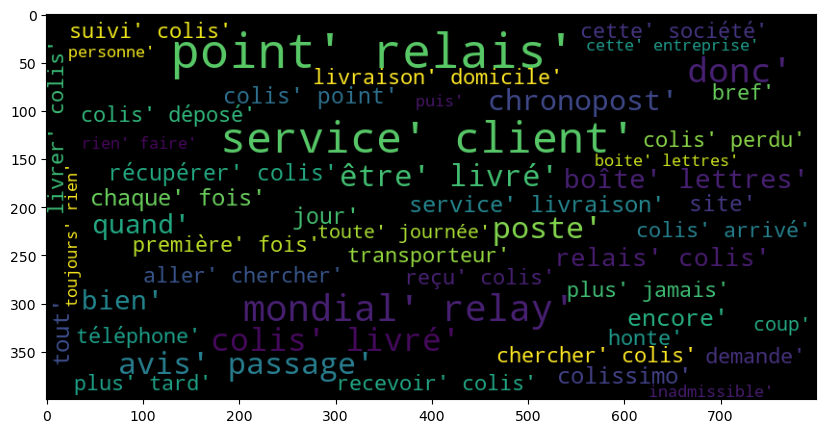

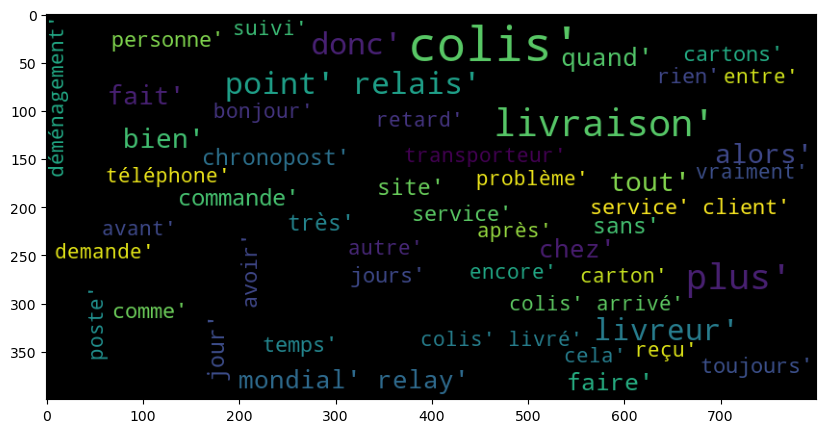

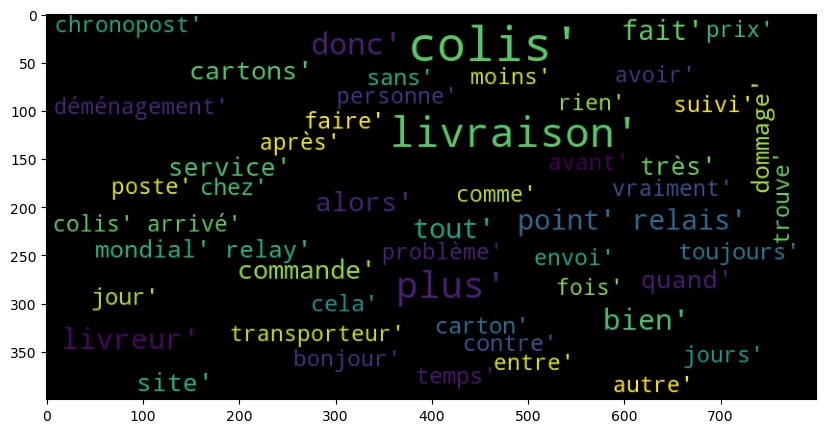

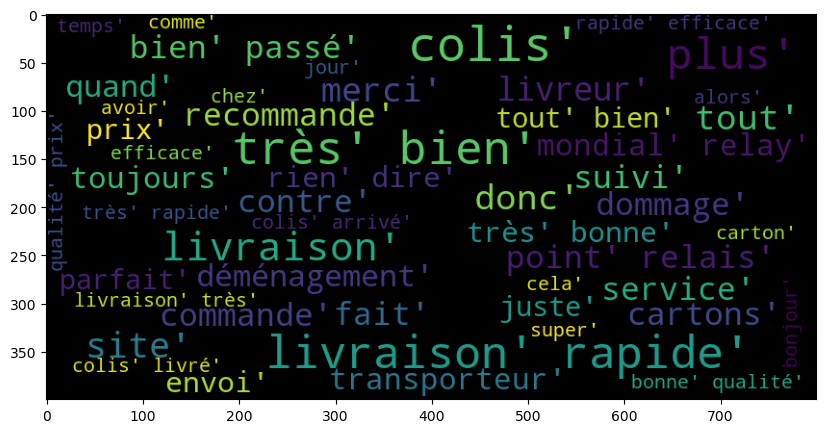

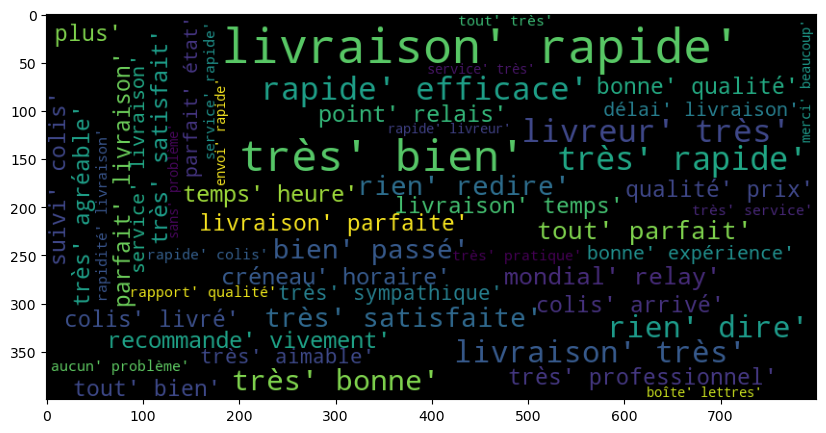

In [63]:
# neuge de poit pour chque note 

# Cr√©ation des nuages de mots pour chaque note de 1 √† 5
for i in range(1, 6):
    df_note = df_avis_Annalys[df_avis_Annalys["Note"] == i]
    VisualisationGeneral.plot_word_cloud(df_note, 'tokens')
